# Online Shoppers Purchasing Intention - Clustering

## 0. Introduction

The following notebook details the process of building a model that is able to segment visitors of an online retail website based on their behaviour on the site. The objective of the project is to utilise __clustering__, an unsupervised machine learning technique, to place visitors of the site into different groups by identifying patterns in the data collected on users of the web page. This will allow the e-commerce company to make informed decisions to increase the number of sales and revenue generated by targetting specific groups of website visitors.

#### Data Source

[Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

The dataset, downloaded from the UC Irvine Machine Learning Repository, was kindly provided by:

C. OKAN SAKAR<br>
Department of Computer Engineering<br>
Faculty of Engineering and Natural Sciences<br>
Bahcesehir University<br>
34349 Besiktas<br>
Istanbul<br>
Turkey

YOMI KASTRO<br>
Inveon Information Technologies Consultancy and Trade<br>
34335 Istanbul<br>
Turkey

#### Dataset Information

The following information about the dataset and its attributes was extracted from the dataset page from the UCI Machine Learning Repository (linked above):

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user
profile, or period.

The dataset consists of 10 numerical and 8 categorical attributes.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.

The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, month of the year, and a Boolean value indicating whether or not a purchase was made (Revenue).

#### Notebook Contents

The notebook has been split into the following sections:

>__1. Importing and Examination__<br><br>
__2. Exploratory Data Analysis__<br><br>
__3. Feature Engineering__<br><br>
__4. Dimensionality Reduction__<br><br>
__5. Model Building__<br><br>
__6. Results__<br><br>
__7. Conclusion__<br><br>

## 1. Importing and Examination

In [79]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [82]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [83]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


The data has been provided in a clean and useable format with no null values. One small change to make is to change 'June' in the Months column to 'Jun' because all other months have been abbreviated to three characters. This is for consistency and to avoid confusion and errors during analysis.


In [84]:
df['Month'].replace({'June': 'Jun'}, inplace=True)

The data can now be further analyzed visually to provide a better understanding of the distribution of each of the features.

## 2. Exploratory Data Analysis

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', palette='crest')
%matplotlib inline

In [86]:
# Separating continuous, discrete and categorical features
discrete = [i for i in df.select_dtypes(include='int64').columns]
continuous = [i for i in df.select_dtypes(include='float64').columns]
categorical = [i for i in df.select_dtypes(include=['object', 'bool']).columns]

# Special day has float64 dtype but is actually discrete
discrete.append('SpecialDay')
continuous.remove('SpecialDay')

# Month will be plotted separately so that the months can be ordered
categorical.remove('Month')

#### Visualizing Discrete Numerical Features

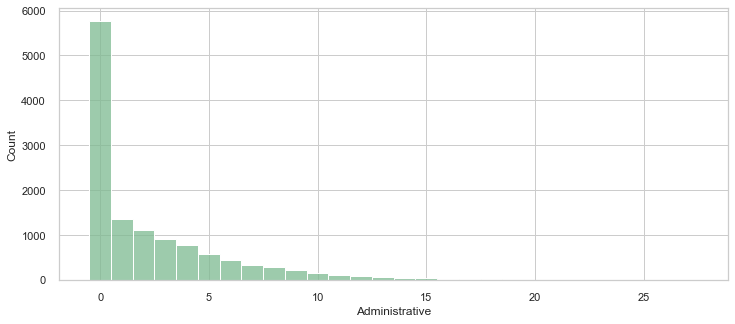

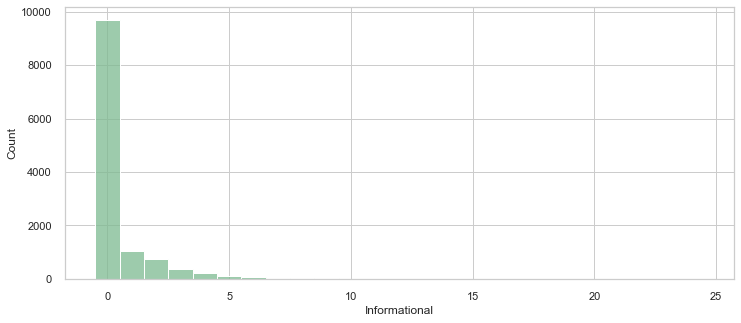

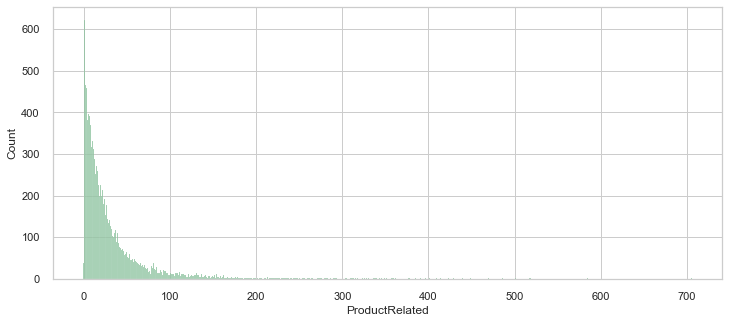

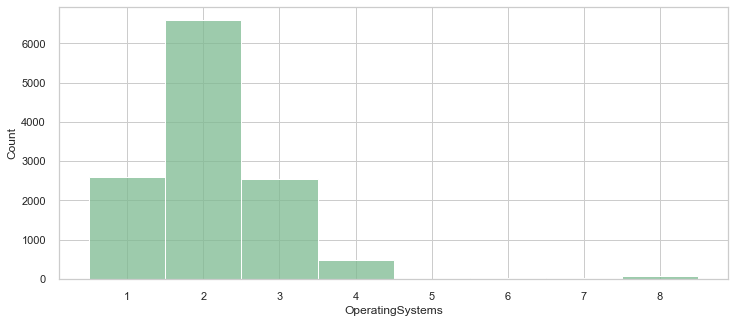

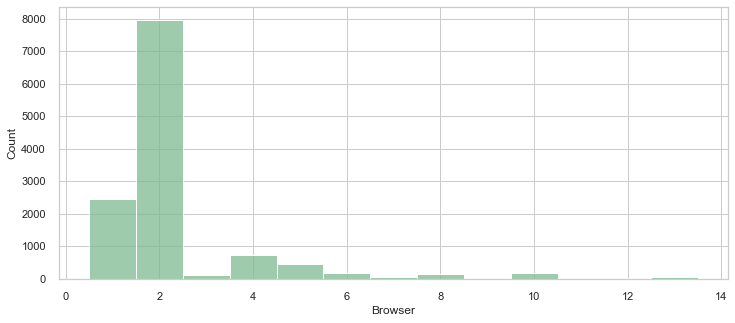

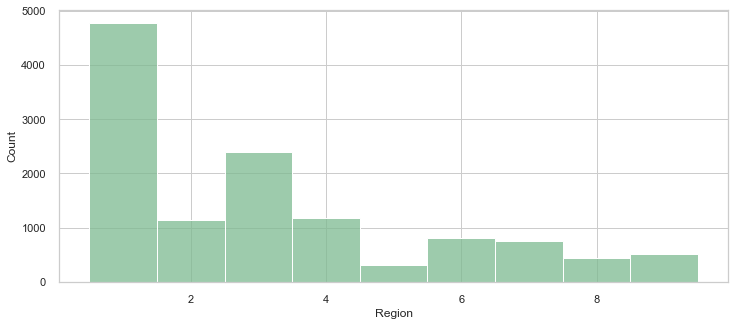

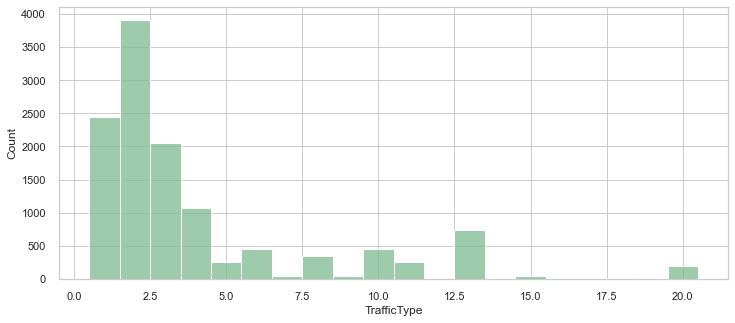

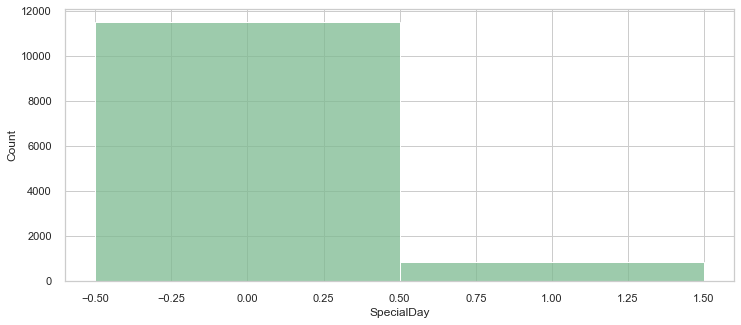

In [87]:
for i in discrete:
    plt.figure(figsize=(12, 5))
    sns.histplot(df, x=i, discrete=True)
    plt.show()

It appears that the discrete features are right-skewed.

#### Visualizing Continuous Numerical Features

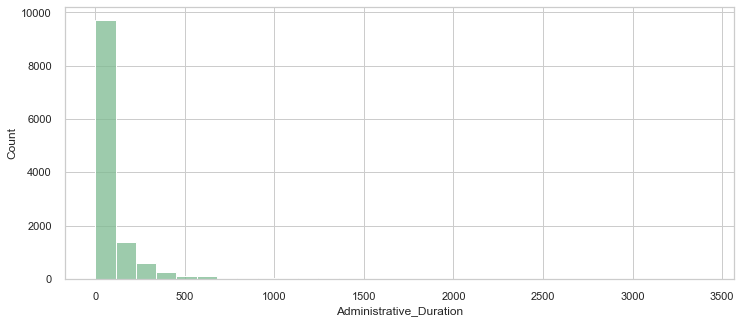

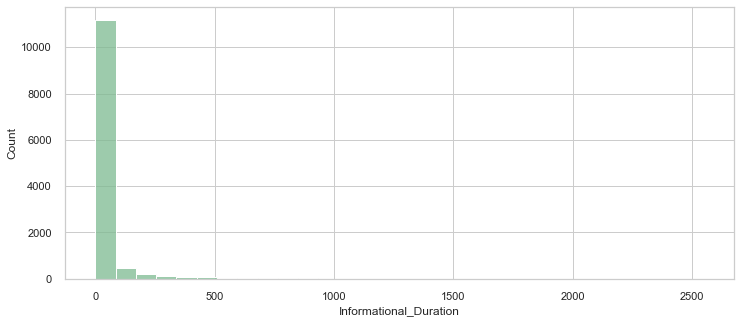

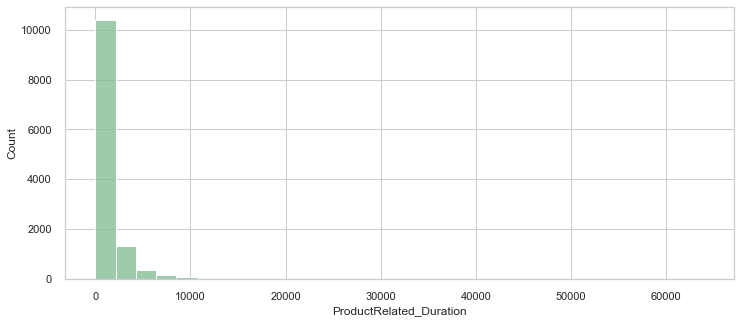

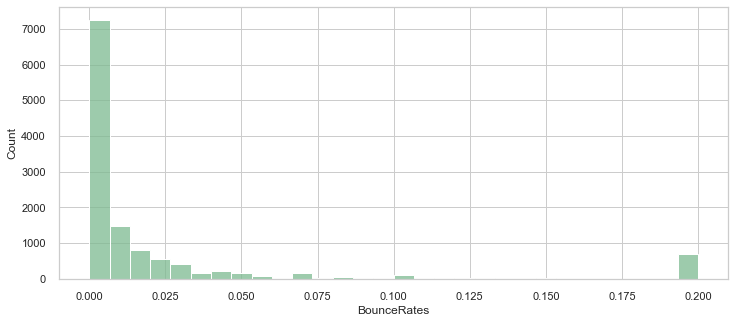

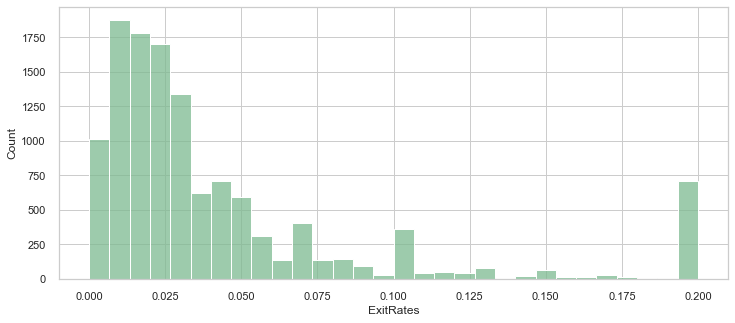

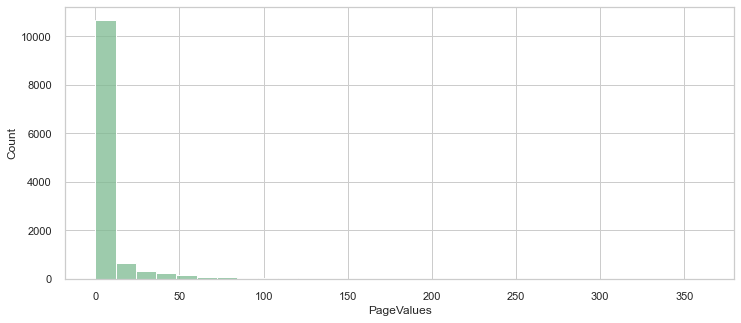

In [88]:
for i in continuous:
    plt.figure(figsize=(12, 5))
    sns.histplot(df, x=i, bins=30)
    plt.show()

The continuous features are also right-skewed.

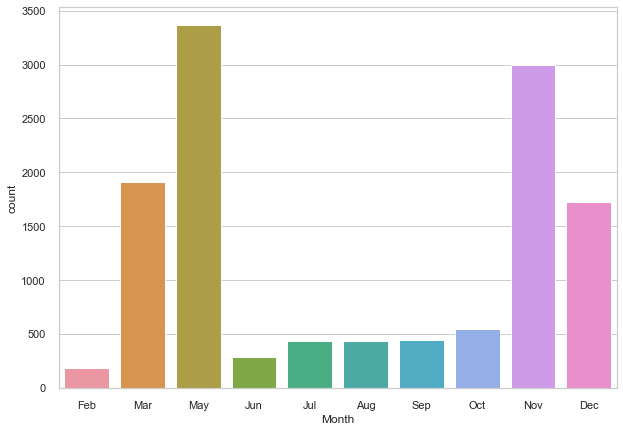

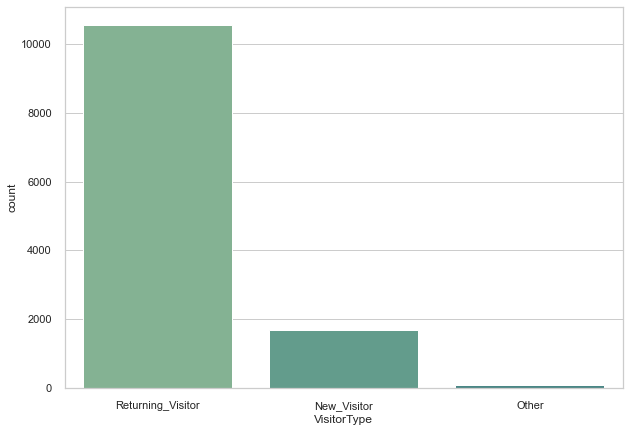

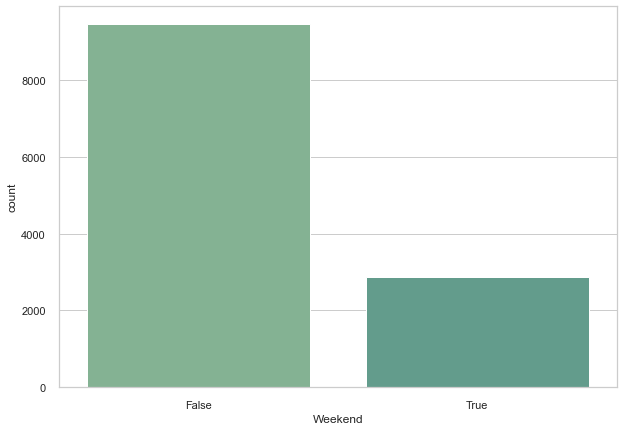

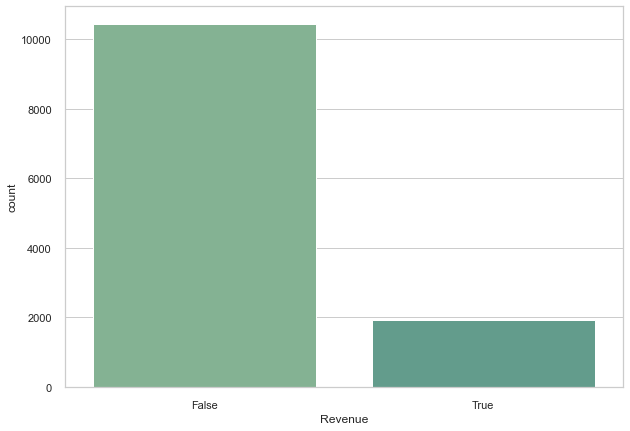

In [89]:
month_order = ['Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 7))
sns.countplot(x='Month', data=df, order=month_order)
plt.show()

for i in categorical:
    plt.figure(figsize=(10, 7))
    sns.countplot(x=i, data=df)
    plt.show()

#### Correlation between numerical features

The heatmap below displays the pearson correlation coefficients between two features which is an indicator of strongly they are both related.

A value of 1 indicates a strong positive correlation, a value of -1 indicates a strong negative correlation and a value of 0 indicates no correlation.

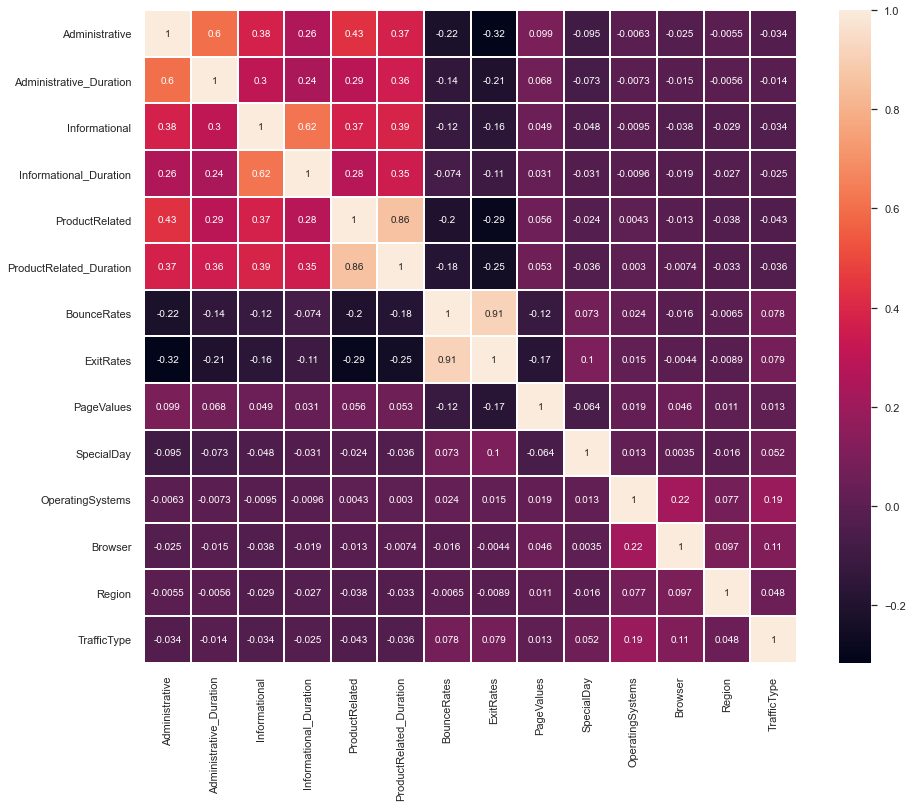

In [90]:
numerical = [i for i in df.select_dtypes(include=['float64', 'int64']).columns]

plt.figure(figsize=(15,12))
sns.heatmap(df[numerical].corr(), linewidths=0.05, square=True, annot=True)
plt.show()

The heatmap shows that the features are largely uncorrelated, except for ProductedRelated with ProductRelated_Duration and BounceRates with ExitRates. A commonly-used absolute threshold value of >0.7 indicates the presence of multicollinearity. Dimensionality reduction techniques used in Section 4 aim to reduce the effect of multicollinearity by minimizing the number of features while maintaining a reasonable level of variance in the data.

## 3. Feature Engineering

In the following section, the dataset features will be preprocessed and prepared to ensure optimal performance of the model built in Section 5. The steps involved will be as follows:

- Standardization of continuous features
- One-hot encoding nominal categorical features
- Ordinal encoding ordinal categorical features

Standardization is a scaling technique that transforms each feature such that the mean of the column is zero and the standard deviation is one. Standardization is especially important because a distance-based algorithm, K-means clustering, will be used to from groups of website visitors. Without scaling, higher weightage could be placed on features with a higher magnitude, causing a bias. Standarizarion ensures that all features contribute equally to the determination of groups. This will only be applied to continuous numerical features because discrete numerical features will be treated as ordinal categorical features.

One-hot encoding (each unique value in the column will be converted into a new feature that is assigned a binary value corresponding to the presence of that value in a particular instance) will be used for categorical features without any order and ordinal encoding (each unique value is assigned an integer value corresponding to 'rank' of that value) will be used for features that contain values with intrinsic natural order. This is to allow the algorithm to better understand the categorical variables to make more accurate predictions.

ColumnTransformer will be used to allow different features in the dataset to be transformed separately using different preprocessing techniques.

In [91]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

In [92]:
ss = StandardScaler()
ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder(categories=[month_order, sorted(list(df['SpecialDay'].value_counts().index))])

ct = make_column_transformer(
    (ss, continuous),
    (ohe, ['Administrative',
           'Informational',
           'ProductRelated',
           'OperatingSystems',
           'Browser', 'Region',
           'TrafficType',
           'VisitorType',
           'Weekend',
           'Revenue']),
    (oe, ['Month', 'SpecialDay']))

X = ct.fit_transform(df)

In [93]:
# Checking that features were encoded and scaled
pd.set_option('display.max_columns', 100)
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,6.281359e-17,-2.535595e-17,-8.298309e-17,-6.454241e-17,3.688137e-17,1.060340e-16,0.467802,0.109813,0.090349,0.074209,0.062044,0.046634,0.035036,0.027413,0.023277,0.018248,0.012409,0.008516,0.006975,0.004542,0.003569,0.003082,0.001946,0.001298,0.000973,0.000487,0.000162,0.000162,0.000324,0.000243,0.000324,0.000081,0.000081,0.786618,0.084428,0.059043,0.030819,0.018005,0.008029,0.006326,0.002920,0.001135,0.001217,0.000568,0.000081,0.000406,0.000081,0.000162,0.000081,0.000081,...,0.645661,0.008516,0.059692,0.037875,0.014112,0.003974,0.010949,0.000081,0.013220,0.000487,0.000811,0.004947,0.387672,0.092133,0.194891,0.095864,0.025791,0.065288,0.061719,0.035199,0.041444,0.198783,0.317356,0.166423,0.086699,0.021087,0.036010,0.003244,0.027818,0.003406,0.036496,0.020032,0.000081,0.059854,0.001054,0.003082,0.000243,0.000081,0.000811,0.001379,0.016058,0.137388,0.006894,0.855718,0.767397,0.232603,0.845255,0.154745,4.821573,0.307137
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,0.498982,0.312670,0.286692,0.262122,0.241245,0.210863,0.183880,0.163290,0.150787,0.133853,0.110706,0.091891,0.083227,0.067242,0.059633,0.055432,0.044078,0.036001,0.031183,0.022055,0.012735,0.012735,0.018009,0.015597,0.018009,0.009006,0.009006,0.409712,0.278040,0.235715,0.172834,0.132974,0.089249,0.079288,0.053958,0.033679,0.034859,0.023821,0.009006,0.020134,0.009006,0.012735,0.009006,0.009006,...,0.478332,0.091891,0.236925,0.190902,0.117957,0.062917,0.104067,0.009006,0.114219,0.022055,0.028468,0.070166,0.487239,0.289225,0.396132,0.294416,0.158517,0.247043,0.240655,0.184289,0.199322,0.399101,0.465466,0.372475,0.281405,0.143680,0.186322,0.056867,0.164459,0.058267,0.187529,0.140117,0.009006,0.237226,0.032455,0.055432,0.015597,0.009006,0.028468,0.037107,0.125705,0.344271,0.082745,0.351390,0.422509,0.422509,0.361676,0.361676,3.169291,0.994586
min,-4.571914e-01,-2.449305e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,-3.171778e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [94]:
# Checking categories for ordinal encoder
for i in oe.categories:
    print(i)

['Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]


## 4. Dimensionality Reduction

Dimensionality reduction aims to lower the number of dimensions in the numerical input data while preserving meaningful properties of the original data. Fewer, more important features will work better in conjunction with the unsupervised learning algorithm in Section 5.

The dimensionality reduction technique implemented in this study is Principal Component Analysis (PCA). PCA retains essential features in the data that have greater variance and removes the non-essential features. PCA is designed for use on continuous variables so although it would work on the binary data from encoding of discrete and categorical features, it might not be the most appropriate choice.

Another technique is Factor Analysis of Mixed Data (FAMD) which is able to handle data with both categorical and numerical features. At present, FAMD is only available on Python through the [Prince](https://github.com/MaxHalford/prince) library.

However, the reason for implementing PCA over FAMD at this stage of the project is that PCA with scikit-learn is more widely-used with more documentation available. However, dimensionality reduction with FAMD using Prince is something that will be explored in future work.

In [95]:
from sklearn.decomposition import PCA

In [96]:
# Reducing dimensions while maintaining 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_dr = pca.fit_transform(X)

X_dr.shape

(12330, 44)

PCA has reduced the number of features from 420 in the original data to 44.

## 5. Model Building

In the following section, the unsupervised learning algorithm K-means clustering will be used to group similar data points into 'clusters' to identify underlying patterns in the data. The number of groups is defined by a number _k_.

The algorithm starts by randomly selecting _k_ points, known as the centroids, which are used as the initial beginning points for each cluster. Each data point is assigned to its nearest centroid (in terms of Euclidean distance) to form _k_ clusters. Then, new centroids are generated based on the mean coordinates of all data points from the corresponding cluster and each data point is assigned to its nearest centroid again. This iterative process is repeated until:
- The most optimal clusters are found (where the Euclidean dustance of each data point to its nearest centroid is minimized)
- The algorithm has attempted the defined number of iterations

The value for _k_ can be defined with:
1. Elbow Method
2. Silhouette Score

The elbow method performs clustering with a definied range of values for _k_ and produces a score (e.g. distortion, the sum of squared distances from each point to its assigned centroid) for each _k_. The score for each model is plotted in a line and the 'elbow' point of inflection on the curve indicates the best value for _k_. However, there is not always a strong inflection point to confidently suggest a value for _k_, so the silhouette method can also be used.

Silhouette scores indicate the quality of a cluster by measuring how similar a data point is to its own cluster compared to other clusters (in terms of distance). It is a value in the range of -1 to +1 where a value of +1 suggests that a sample is far away from neighbouring clusters, a value of 0 suggetss that the sample is on the decision boundary between two adjacent clusters and a value of -1 suggests that the sample is in the wrong cluster.

A combination of the elbow method and silhouette score will be used to determine _k_ in this analysis.


In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

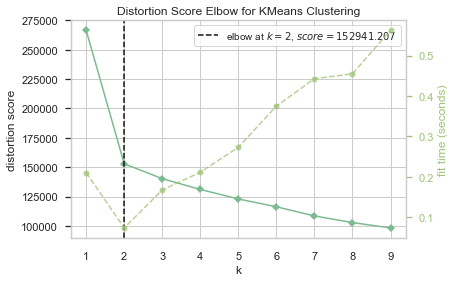

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [98]:
# Testing k from 1 to 10
elbow = KElbowVisualizer(KMeans(), k=(1, 10), metric='distortion')

elbow.fit(X_dr)
elbow.show()

The graph above suggests that the optimal number of clusters is 2. The silhouette method will be used to verify this value.

In [99]:
# Silhouette coefficient is only defined if number of labels is 2 or greater
models = [KMeans(n_clusters=k, random_state=42).fit(X_dr) for k in np.arange(2, 11, 1)]
scores = [silhouette_score(X_dr, model.labels_) for model in models]

In [100]:
print(f'The highest silhouette score is {max(scores)} for k = {scores.index(max(scores)) + 2} clusters.')

score_table = pd.DataFrame({'k': np.arange(2, 11, 1), 'Silhouette Score': scores})
score_table.set_index('k', inplace=True)
score_table.style.highlight_max(subset='Silhouette Score', color='lightgreen')

The highest silhouette score is 0.391445836942294 for k = 2 clusters.


,Silhouette Score
k,
2,0.391446
3,0.336221
4,0.305737
5,0.265263
6,0.228080
7,0.227398
8,0.231723
9,0.228601
10,0.220566


The highest silhouette score achieved was also with 2 clusters. The score for each sample per cluster can be visualized below. The graph shows that none of the samples have a negative value for silhouette coefficient, therefore none of the data points have been placed in an incorrect cluster.

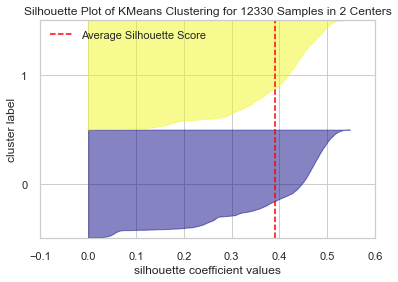

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 12330 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [101]:
silhouette = SilhouetteVisualizer(KMeans(n_clusters=2, random_state=42), colors='plasma')

silhouette.fit(X_dr)
silhouette.show()

The data can now be clustered into two groups as k=2 has been identified to be the optimal number of clusters for the K-Means algorithm.

In [102]:
kmeans = KMeans(n_clusters=2, random_state=42)
y = kmeans.fit_predict(X_dr)
df['Cluster'] = y

## 6. Results

In [103]:
df['Cluster'].value_counts()

1    6192
0    6138
Name: Cluster, dtype: int64

The model was able to group the data into two clusters (referred to as Cluster 0 and Cluster 1 at this stage). It appears that the data was split relatively evenly between both clusters. The following section contains visualizations of the clusters between various features.

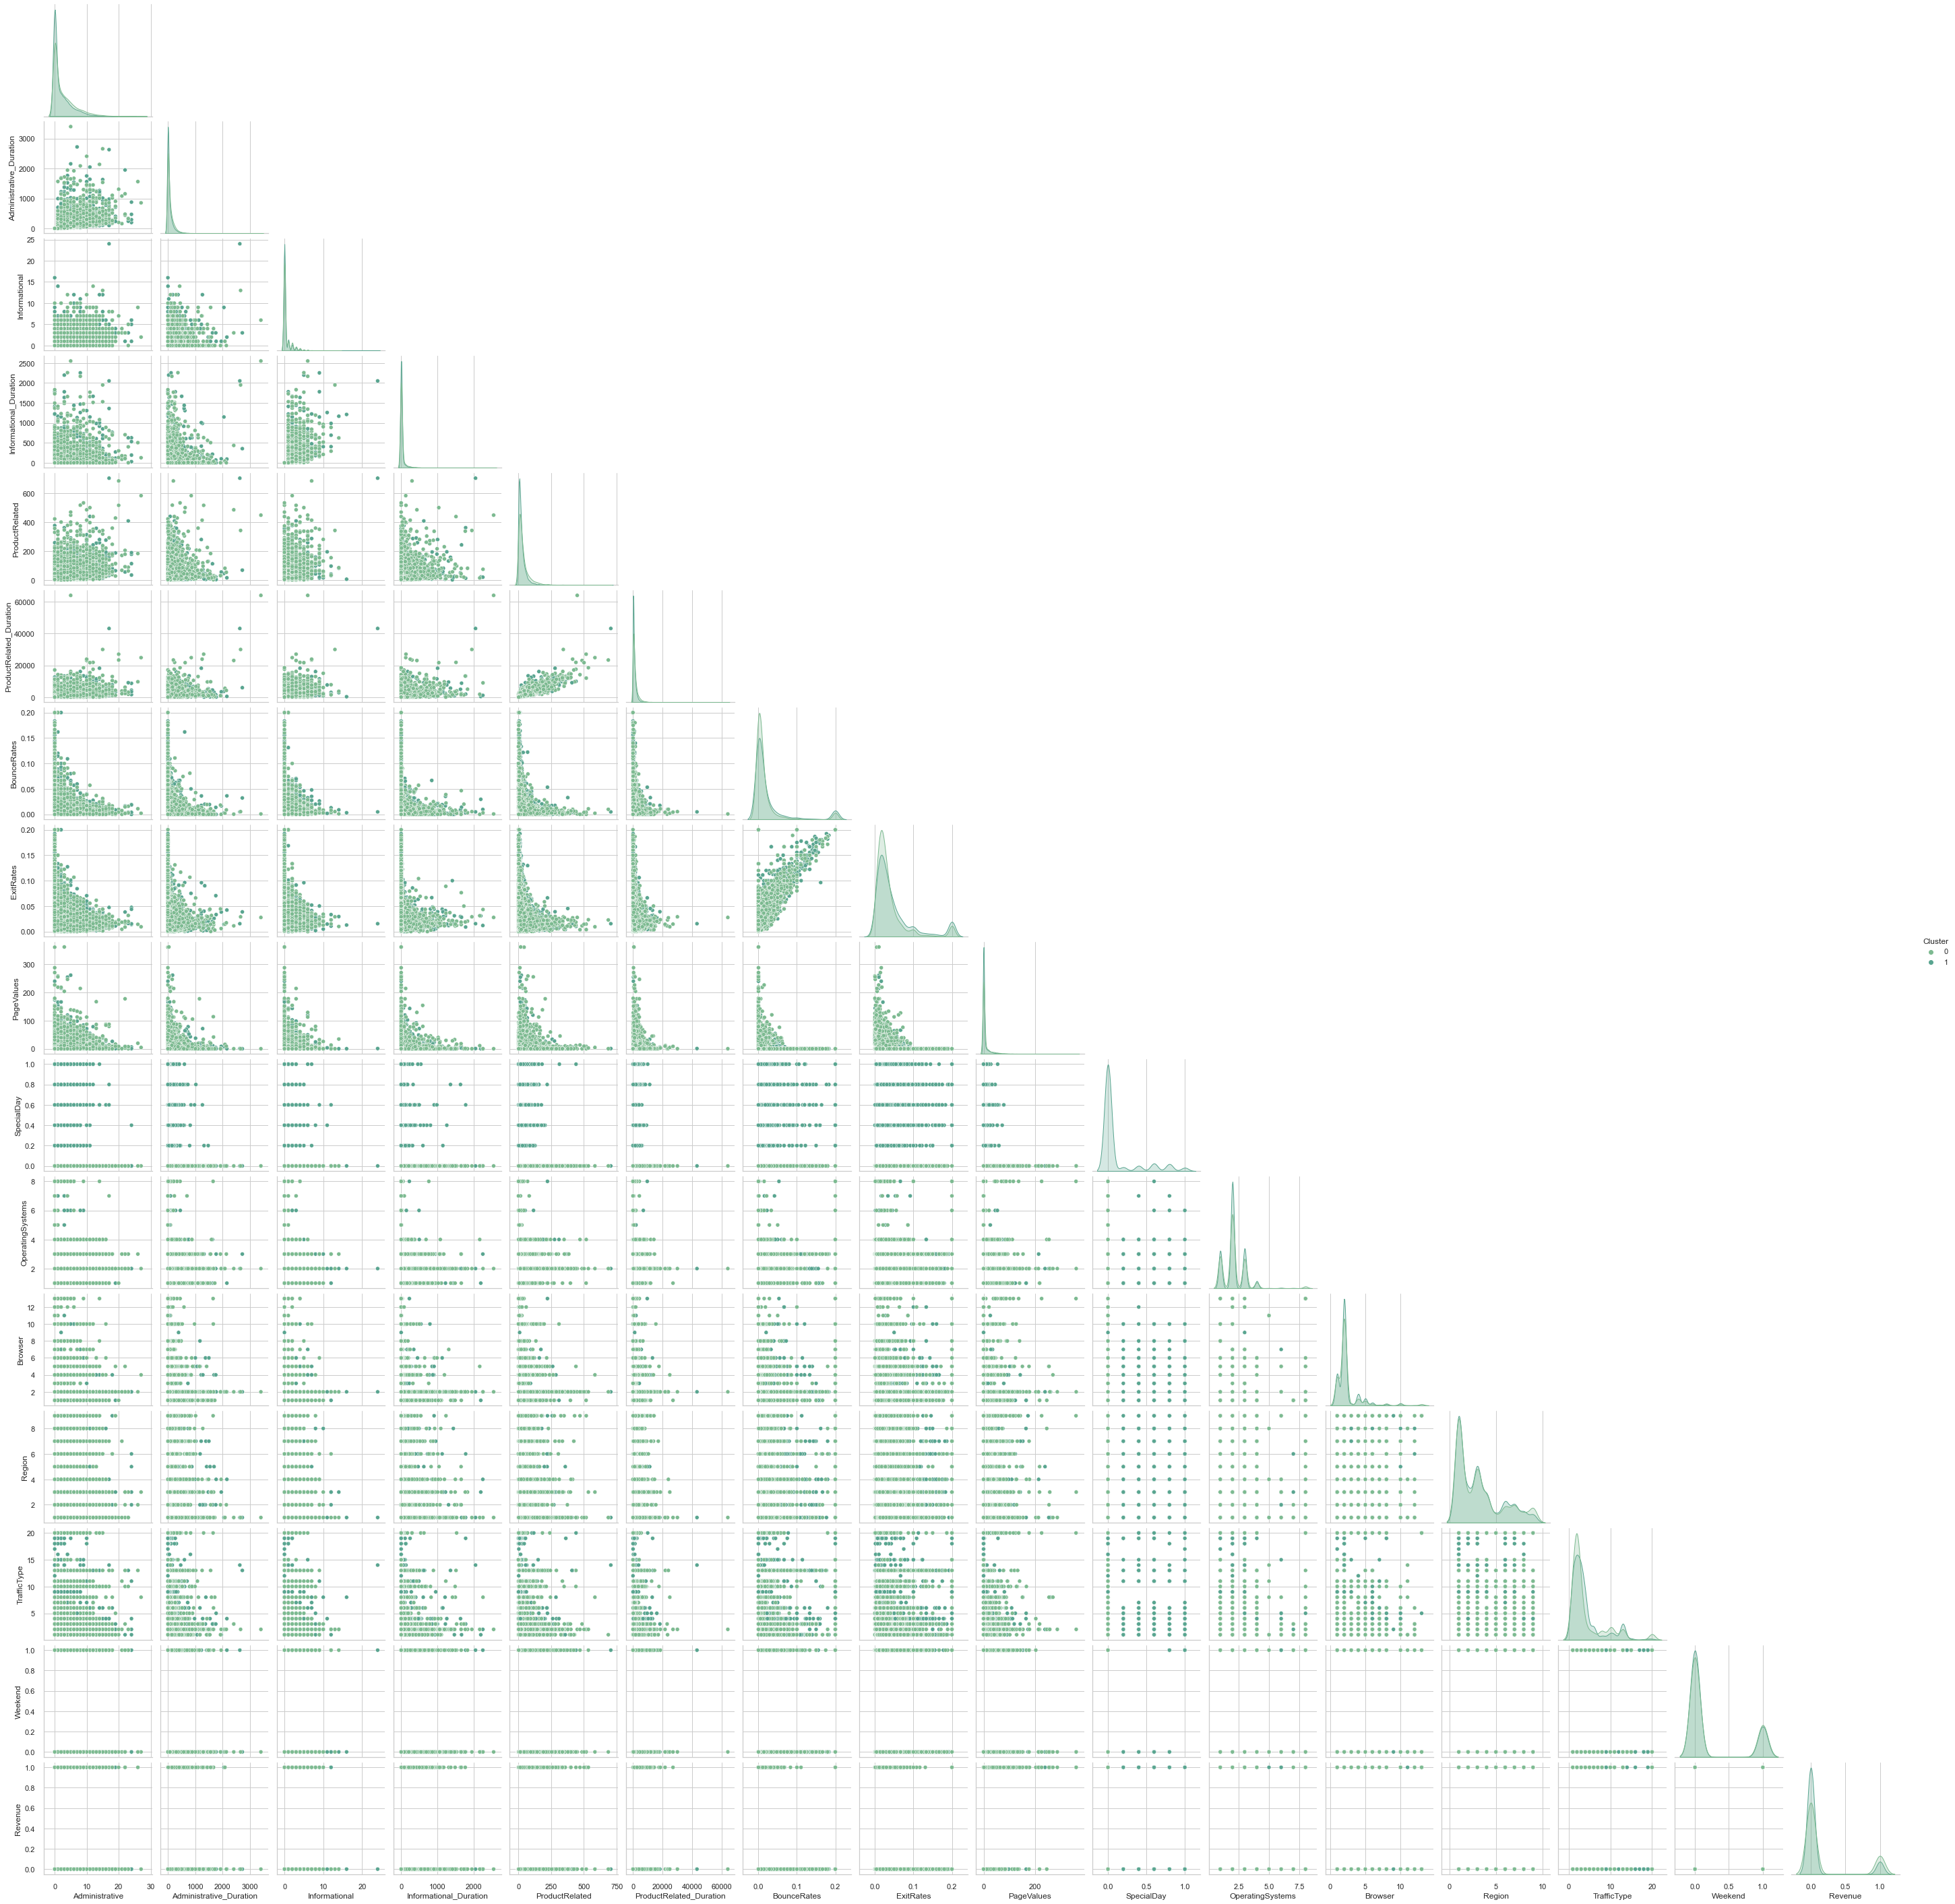

In [104]:
sns.pairplot(df, hue='Cluster', corner=True)
plt.show()

The matrix shows that the two clusters are largely influenced by the SpecialDay feature, with 0 in the first cluster and the rest of the values in the second cluster. This indicates that the one group of customers visits the site on a regular day, not close to a special occasion and the other group visits the site close to a special date and is more likely to end their browse with a purchase.

This is also verified by the parallel coordinates plot below, where it can be seen that a high concentration of larger values of SpecialDay belong to Cluster 1. The parallel coordinates plot enables the visualization of multivariate data by displaying each data sample as a polyline connecting points on vertical lines that each represent the value of a feature. The data will be standardized again as features on the same scale can be evaluated more clearly. A small random sample of the data will be plotted to prevent clutter (12,330 lines would be messy).

In [105]:
# Creating a dataframe for parallel coordinates plot with scaled numerical values
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_scaled = StandardScaler().fit_transform(numeric_df)
scaled_df = pd.DataFrame(data=numeric_scaled, columns=numeric_df.columns)
scaled_df['Cluster'] = y
scaled_df = scaled_df.sample(frac=0.2, random_state=42) # Taking a random 20% sample of rows
scaled_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Cluster
8916,0.206173,0.348932,-0.396478,-0.244931,0.365801,-0.074462,-0.368012,-0.617956,-0.317178,-0.308821,-1.233426,3.286094,1.187859,1.721839,0
772,1.109339,2.017134,1.178195,1.428680,1.152783,0.684125,-0.412355,-0.785204,-0.204820,-0.308821,-0.136078,-0.207952,-0.061364,-0.514182,1
12250,-0.395938,-0.224547,-0.396478,-0.244931,2.119647,1.627964,-0.443497,-0.622497,-0.131313,-0.308821,-0.136078,-0.207952,-0.477771,-0.514182,0
7793,-0.094882,0.340447,-0.396478,-0.244931,-0.488636,-0.307317,-0.285813,-0.343329,1.657882,-0.308821,-0.136078,1.539071,1.604266,-0.017289,0
6601,4.722002,2.983061,4.327541,4.968806,3.064025,1.961574,-0.320907,-0.607996,0.229506,-0.308821,-0.136078,-0.207952,-0.061364,-0.762629,0


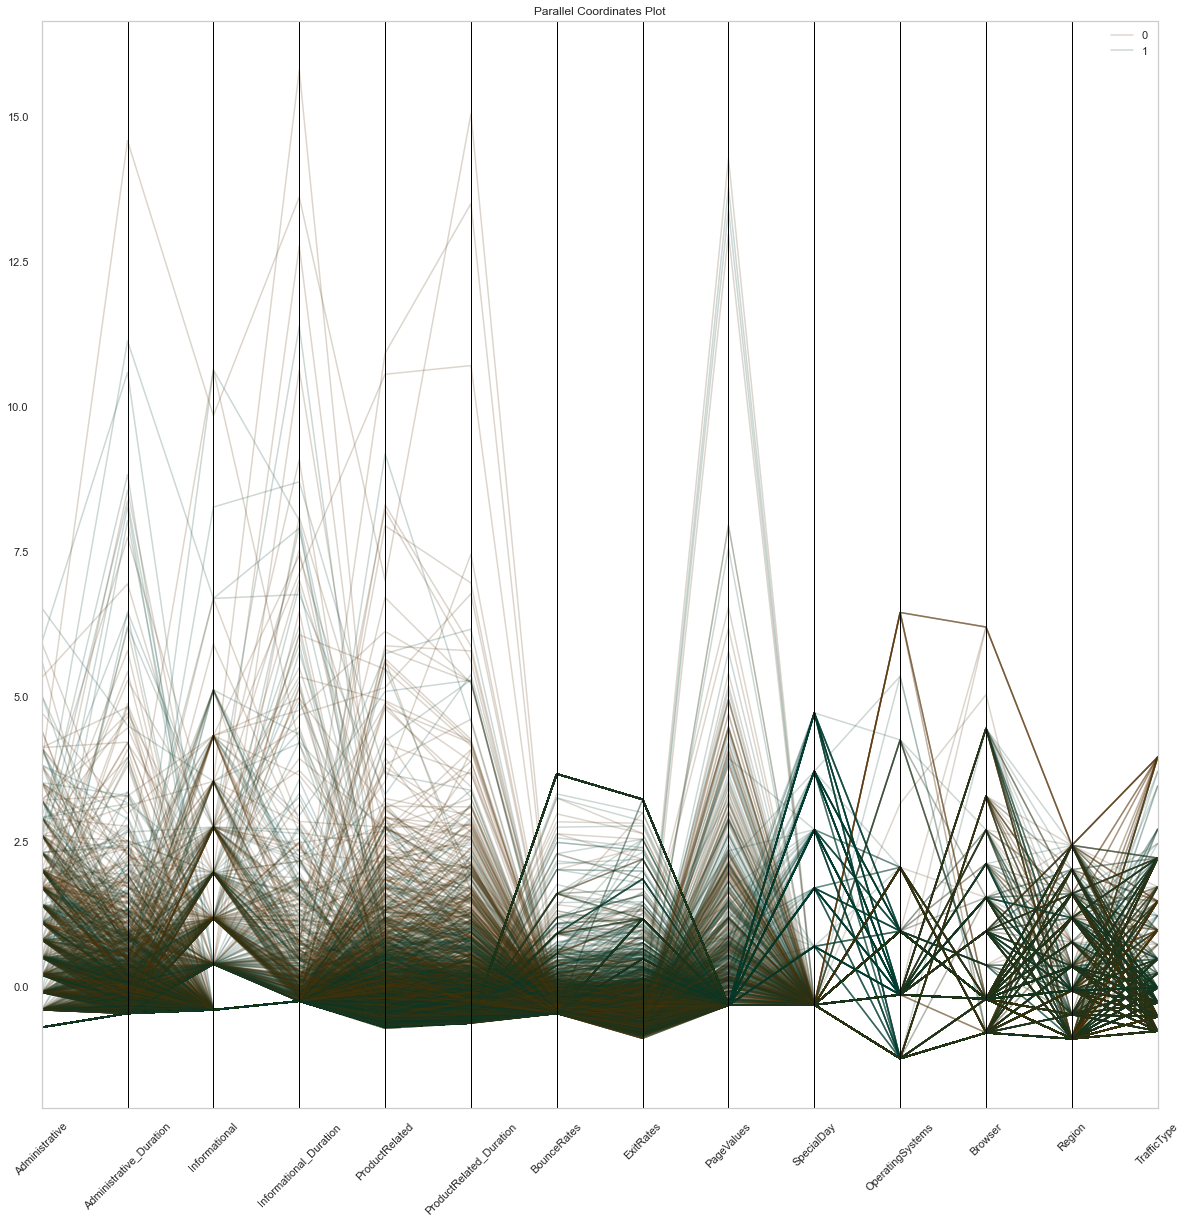

In [106]:
plt.figure(figsize=(20, 20))
pd.plotting.parallel_coordinates(scaled_df, 'Cluster', colormap='BrBG', alpha=0.2)
plt.title("Parallel Coordinates Plot")
plt.xticks(rotation=45)
plt.show()

## 7. Conclusion

#### Summary

The objective of this project was to segment different groups of visitors of an online retail store based on their behaviour on the site. Using K-means clustering, two clusters were found that differed in the dates that the customers browsed the website. The first group browsed on regular days while the second group mostly browsed on dates close to a special occasion such as Valentine's Day or Mother's Day.

Data has shown that the second group, who shop closer to special occasions, are more likely to make a purchase after browsing. The retailer can use the clusters to generate more sales, perhaps through specific marketing campaigns to encourage shoppers on regular days to make purchases or to further increase the revenue generated close to special dates.

#### Future Work

Some areas to explore in future work that could lead to model improvements are listed below:
- Dimensionality reduction with t-distributed stochastic neighbor embedding (t-SNE)
- Testing other clustering algorithms (minibatch k-means, affinity propagation, spectral clustering) 